Денис Иванов

Домашнее задание

Продвинутая линейная алгебра

1. Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная:

d) матрица, у которой определитель = 1, и все элементы не равны 0:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [47]:
import numpy as np
import math

from sklearn.metrics import mean_squared_error 

In [3]:
# диагональная,  ортогональная, но не единичная
A = np.diag([1, -1, -1])
A

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [4]:
AT = A.T
AT

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [5]:
A @ AT


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [11]:
np.linalg.det(A)

1.0

In [6]:
# верхнетреугольная, ортогональная  / она же нижнетреугольная, ортогональная
B = np.array([ 
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, -1],
    ])
B

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [7]:
B @ B.T


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [10]:
np.linalg.det(B)

1.0

In [8]:
# матрица, у которой определитель = 1, и все элементы не равны 0
C = np.array([
    [3,4], 
    [2,3]
])
C

array([[3, 4],
       [2, 3]])

In [9]:
np.linalg.det(C)

1.0000000000000004

In [15]:
# матрица (3x3), у которой определитель = 1
D = np.array([[0,0,1],[1,0,0], [0,1,0]])
D

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [16]:
np.linalg.det(D)

1.0

2. Найдите спектральное разложение матрицы:
np.array([[1, 2],
[2,3]])


In [29]:
E = np.array([[1, 2],
              [2,3]])
E

array([[1, 2],
       [2, 3]])

In [33]:
a, b, c  = np.linalg.svd(E, compute_uv = True) 

print ('Матрица 1, столбцы которой являются собственными векторами матрицы  E \n')
print (a)
print ('Матрица 2, собственные значения  \n')
print (b)
print ('Матрица 3, обратная матрице 1 \n')
print (c)

Матрица 1, столбцы которой являются собственными векторами матрицы  E 

[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
Матрица 2, собственные значения  

[4.23606798 0.23606798]
Матрица 3, обратная матрице 1 

[[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]


In [32]:
w, v = np.linalg.eig(E)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]), '\n')
    print("соответствующий ему собственный вектор " + str(v[:,i]), '\n')

Собственное значение -0.2360679774997898 

соответствующий ему собственный вектор [-0.85065081  0.52573111] 

Собственное значение 4.23606797749979 

соответствующий ему собственный вектор [-0.52573111 -0.85065081] 



3.   Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия использовать MSE.   

In [35]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [36]:
X, y = load_digits(return_X_y=True)

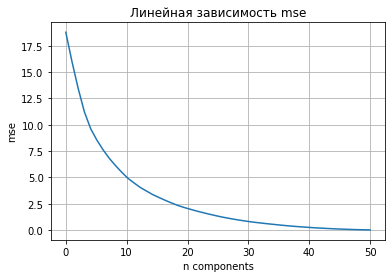

In [48]:
def pca_mse(n):
    pca = PCA(n_components=n, whiten=True)
    pca.fit(X)
    X_tr  = pca.transform(X)
    X_inv = pca.inverse_transform(X_tr)
    mse = mean_squared_error(X_inv, X)
    return mse

mses = []
N = 50

for i in range(0,N):
    m = pca_mse(i)
    mses.append((m))

x = np.linspace(0, 50)
y = mses

plt.title("Линейная зависимость mse") 
plt.xlabel("n components")
plt.ylabel("mse") 
plt.grid() 
plt.plot(x, y)